In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
os.environ["SPOTIPY_CLIENT_ID"] = 'b1511210915a4096988d72740d6d9b51'
os.environ["SPOTIPY_CLIENT_SECRET"] = '5c79e21e3a5e459792400e570e6e1d27'
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(requests_timeout=None))

In [2]:
import numpy as np
import pandas as pd
import random
import sys

def search_genre(genre, offset=0, max_n=None):
    if max_n is None:
        max_n = sp.search(q=f'genre:"{genre}"', offset=0, limit=1, type='track').get('tracks').get('total')
    if max_n <= 50:
        search = sp.search(q=f'genre:"{genre}"', offset=offset, limit=max_n, type='track').get('tracks')
    else:
        search = {}
        search['total'] = 0
        search['items'] = []
        while search['total'] < max_n:
            step = search['total']+1
            print(f'\r[{step}/{max_n}] (search)', end='')
            num = min(50, max_n-search['total'])
            try:
                tmp = sp.search(q=f'genre:"{genre}"', offset=offset+search['total'], limit=num, type='track').get('tracks')
            except:
                break
            search['items'].extend(tmp.get('items'))
            search['total'] += len(tmp.get('items'))
    return search

def crawl(genres):
    variables = ['id', 
                 'name', 
                 'artist', 
                 'genre', 
                 'popularity', 
                 'acousticness', 
                 'danceability',
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'speechiness',
                 'duration_ms',
                 'key',
                 'loadness',
                 'mode',
                 'tempo',
                 'valence',
                 'available_market',
                 'release_date',
                 'explicit']
    columns = {v:[] for v in variables}
    data = pd.DataFrame(data=columns)
    for i, genre in enumerate(genres):
#         results = search_genre(genre)
#         n = results.get('total')
#         for j, result in enumerate(results.get('items')):
        n = sp.search(q=f'genre:"{genre}"', offset=0, limit=1, type='track').get('tracks').get('total')
        if n == 0:
            continue
        offsets = random.sample(list(np.arange(min(n-1, 1999))), k=min(n, 100))
        for j, offset in enumerate(offsets):
#             print(f'\r[{j+1}/{n}] (process)', end='')
            print(f'\r[{j+1}/{len(offsets)}] (process)', end='')
            items = search_genre(genre, offset=offset, max_n=1).get('items')
            if items is None:
                continue
            result = items[0]
#             if result is None: # do not find track
#                 continue
            feature = sp.audio_features(result.get('id'))[0]
            row = {
                'id': result.get('id'), 
                'name': result.get('name'), 
                'artist': result.get('artists')[0].get('name'), 
                'genre': genre, 
                'popularity': result.get('popularity'),
                'available_market': len(result.get('available_markets')),
                'duration_ms': result.get('duration_ms'),
                'explicit': result.get('explicit'), # has explicit lyrics
                'release_date': result.get('album').get('release_date'),
                'acousticness': feature.get('acousticness'), 
                'danceability': feature.get('danceability'),
                'energy': feature.get('energy'),
                'instrumentalness': feature.get('instrumentalness'),
                'liveness': feature.get('liveness'),
                'speechiness': feature.get('speechiness'),
                'key': feature.get('key'),
                'loadness': feature.get('loudness'),
                'mode': feature.get('mode'),
                'tempo': feature.get('tempo'),
                'valence': feature.get('valence')
            }
            
            data = data.append(row, ignore_index=True)
        print(f'\r[{i+1}/{len(genres)}] genre: {genre}'.rjust(20, ' '))
    return data

In [3]:
random.seed(113)
np.random.seed(113)
allGenres = sp.recommendation_genre_seeds()['genres']
data = crawl(allGenres)

[1/126] genre: acoustic
[2/126] genre: afrobeat
[3/126] genre: alt-rock
[4/126] genre: alternative
[5/126] genre: ambient
[6/126] genre: anime
[7/126] genre: black-metal
[8/126] genre: bluegrass
[9/126] genre: blues
[11/126] genre: brazil
[12/126] genre: breakbeat
[13/126] genre: british
[14/126] genre: cantopop
[15/126] genre: chicago-house
[16/126] genre: children
[17/126] genre: chill
[18/126] genre: classical
[19/126] genre: club
[20/126] genre: comedy
[21/126] genre: country
[22/126] genre: dance
[23/126] genre: dancehall
[24/126] genre: death-metal
[25/126] genre: deep-house
[26/126] genre: detroit-techno
[27/126] genre: disco
[28/126] genre: disney
[29/126] genre: drum-and-bass
[30/126] genre: dub
[31/126] genre: dubstep
[32/126] genre: edm
[33/126] genre: electro
[34/126] genre: electronic
[35/126] genre: emo
[36/126] genre: folk
[37/126] genre: forro
[38/126] genre: french
[39/126] genre: funk
[40/126] genre: garage
[41/126] genre: german
[42/126] genre: gospel
[43/126] genre:

In [4]:
print('head:')
display(data.head())

head:


,id,name,artist,genre,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit
0,3XnDbrxxtA40HPIIRWLgRT,Eloise,Penny and Sparrow,acoustic,61.0,0.6950,0.606,0.415,0.001490,0.1740,0.0475,168712.0,7.0,-8.317,0.0,137.775,0.405,79.0,2019-08-02,0.0
1,74tjxbbaErZPocRtItsuWN,Ride,Cary Brothers,acoustic,42.0,0.1260,0.496,0.674,0.000333,0.0775,0.0323,220573.0,7.0,-7.768,1.0,117.980,0.196,79.0,2007-05-29,0.0
2,7KJvKmC0rCzGDEcD3YN6IV,Undercover,Wild Rivers,acoustic,39.0,0.6200,0.556,0.325,0.002890,0.1040,0.0322,217897.0,6.0,-13.709,1.0,165.913,0.195,79.0,2016-04-16,0.0
3,1WE055A5d1019EAx79Rg8Q,Mojo Hand,Lightnin' Hopkins,acoustic,43.0,0.6560,0.567,0.560,0.000102,0.1270,0.1470,182508.0,11.0,-8.356,0.0,147.008,0.766,79.0,2008-01-01,0.0
4,5I7ZntCRp2ecAQ7Pk2JDb1,"Enemy, love.",John Mark McMillan,acoustic,39.0,0.0313,0.646,0.642,0.006150,0.1820,0.0342,258937.0,1.0,-8.478,0.0,101.947,0.203,66.0,2017-09-01,0.0


In [5]:
print(data['genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae'
 'reggaeton' 'rock' 'rock-n-roll' 'rockabilly' 'romance' 'salsa' 'samba'
 'sertanejo' 'show-tunes

In [6]:
data.to_csv('tracks.csv', encoding="utf-8")

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('tracks.csv', encoding="utf-8")

In [9]:
len(data['name'].unique())

10496

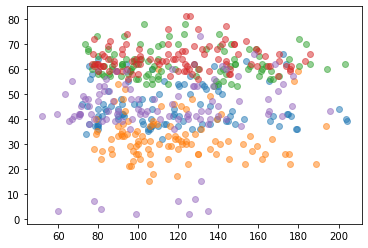

In [10]:
import matplotlib.pyplot as plt
for g in data['genre'].unique()[:5]:
    plt.scatter(data['tempo'][data['genre'] == g], data['popularity'][data['genre'] == g], alpha=.5)
plt.show()

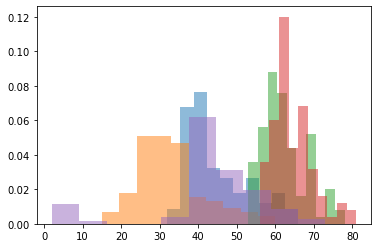

In [11]:
import matplotlib.pyplot as plt
for g in data['genre'].unique()[:5]:
    plt.hist(data['popularity'][data['genre'] == g], alpha=.5, density=True)
plt.show()

In [12]:
import numpy as np
cov = np.corrcoef(data.loc[data['genre'] == 'anime', (data.dtypes != object).values], rowvar=False)

c:\users\jacky\.pyenv\pyenv-win\versions\3.7.5-amd64\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\jacky\.pyenv\pyenv-win\versions\3.7.5-amd64\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


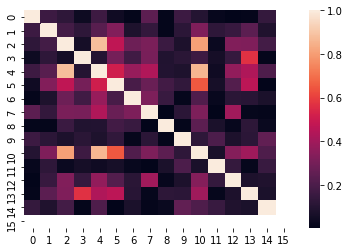

In [13]:
import seaborn as sns
sns.heatmap(np.abs(cov))

In [14]:
len(data['genre'].unique())

112

In [16]:
print(sorted(data['genre'].unique()))

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'reggae', 'reggaeton', 'rock',